# Exploratory Data Analysis on Brain Stroke data



## Table of Contents

* [1. Introduction to Data and Notebook](#1)
    - [1.1 data and library import](#2)
    - [1.2 basic information on categorical data](#3) 
      - [1.2.1 How are yes/no type binary variables distributed ?](#4)
      - [1.2.2 How are non-binary variables distributed ?](#5)
    - [1.3 basic information on non-categorical data ?](#6)
      - [1.3.1 AGE](#7)
      - [1.3.2 BMI](#8)
      - [1.3.3 Glucose](#9)      
    - [1.4 priliminary inference](#10) 
* [2. Balancing the data](#11)
     - [2.1 Introduction](#12)
     - [2.2 Balancing through randomly undersampling the majority class](#13)
* [3. ML Modeling](#13)
     - [3.1 Data preparation](#14)
     - [3.2 Ensemble Voting model](#15)
     - [3.3 Model accuracy](#16)
     - [3.4 XGBoost prediction](#17)
     - [3.5 XGBoost accuracy](#18)     
* [4. Conclusion](#19)


<a id="1"></a>
# 1. Introduction to Data and Notebook

- This is a very nice dataset containing patient details and whether they had stroke or not. 
- The aim of this notebook is to dwelve into this dataset and infer as much information as possible.

### data columns: 

* gender : gender of the person
* age : person's age
* hypertension : has hypertension(1) no hypertension(0)
* hearth_disease : has hearth disease(1) no hearthdisease(0)
* ever_married : has she/he ever been married Yes(1) No(0)
* work_type : work type
* Residence_type : residence type
* avg_glucose_level : average glucose level
* bmi : body mass index
* smoking_status : how often does she/he smoke
* stroke : Yes(1) No(0)

<a id="2"></a> <br>
#### 1.1 data and library import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', size=18) #controls default text size in matplotlib plots which we will use
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report


<a id="3"></a> <br>
#### 1.2 basic information on categorical data

In [ ]:
# data import
brain = pd.read_csv('../input/full-filled-brain-stroke-dataset/full_data.csv');
brain.info();

Its good that we do not have any null data.

<a id="4"></a> <br>
#### 1.2.1 How are yes/no type binary variables distributed ?

Gender, heart disease, stroke, residency are some of the features that can can take one of two possible values.
Here we will visualize their count distribution in the form of pie chart.

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
colors = sns.color_palette('pastel')[0:2];

# How much data represents strokes ?
with_stroke         = len(brain.loc[brain.stroke==1]);
without_stroke      = len(brain.loc[brain.stroke==0]);
ax[0,0].pie([with_stroke,without_stroke], labels = ['with_stroke','without_stroke'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18})

# How much data represents male and female ?
male         = len(brain.loc[brain.gender=='Male']);
female      = len(brain.loc[brain.gender=='Female']);
ax[0,1].pie([male,female], labels = ['male','female'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

# How much data represents heart disease ?
heart_yes         = len(brain.loc[brain.heart_disease==1]);
heart_no          = len(brain.loc[brain.heart_disease==0]);
ax[1,0].pie([heart_yes,heart_no], labels = ['heart_disease','no_heart_disease'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

# How much data represents hypertension ?
hyp_yes         = len(brain.loc[brain.hypertension==1]);
hyp_no          = len(brain.loc[brain.hypertension==0]);
ax[1,1].pie([hyp_yes,hyp_no], labels = ['hyp tension','no_hyp_tension'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

# How much data represents resisdency ?
urban         = len(brain.loc[brain.Residence_type=='Urban']);
rural         = len(brain.loc[brain.Residence_type=='Rural']);
ax[0,2].pie([urban,rural], labels = ['urban','rural'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

# How much data represents marital status ?
single         = len(brain.loc[brain.ever_married=='No']);
married        = len(brain.loc[brain.ever_married=='Yes']);
ax[1,2].pie([single,married], labels = ['single','married'], colors = colors, autopct='%.0f%%',textprops={'fontsize': 18});

- The data is highly imbalanced. 95% of data represents people with no stroke. Hence any prediction will be biased towards
  people having no stroke.
- Same goes for heart disease or hyper tension. That is, 90% of data represents people with no heart disease or hypertension.
- Hence classification can be done only when data imbalance is taken care off. For example, we could randomly reject
  90% of no stroke data and assume the remaining 10% data to retain the statistics of those rejected. 

<a id="5"></a> <br>
#### 1.2.2 How are non-binary variables distributed ?

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,9))

# what about smoking habits?
X = brain.smoking_status.value_counts();
ax[0].pie(X.values, labels = list(X.index), autopct='%.0f%%',textprops={'fontsize': 18});

# what about work_type?
X = brain.work_type.value_counts();
ax[1].pie(X.values, labels = list(X.index), autopct='%.0f%%',textprops={'fontsize': 18});

- Smoking and work type have more than two categories.

<a id="6"></a> <br>
#### 1.3 Basic information on non-categorical data ?

- Here we will visualize the distribution of Age, bmi and glucose levels.

<a id="7"></a> <br>
#### 1.3.1 AGE

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(21,7))

brain.age.plot.hist(bins=25,ax=ax1,color='gray')
ax1.set_title('age distribution')
ax1.set_xlabel('Age [years]')

# male age
brain[brain["gender"]=='Male'].age.plot.hist(bins=25,ax=ax2,color='c')
ax2.set_title('male age distribution')
ax2.set_xlabel('Age [years]')

# female age
brain[brain["gender"]=='Female'].age.plot.hist(bins=25,ax=ax3,color='m')
ax3.set_title('female age distribution')
ax3.set_xlabel('Age [years]')

- There are more females in the age bracket of 20-40 and 40-60 as compared to males.


In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke age
brain[brain["stroke"]==0].age.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('no-stroke age distribution')
ax1.set_xlabel('Age [years]')

# no stroke age
brain[brain["stroke"]==1].age.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('stroke age distribution')
ax2.set_xlabel('Age [years]')


- People with stroke tends to be over 40 years of age with majority between 60-80.

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke age
brain[brain["heart_disease"]==0].age.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('no-heart disease age distribution')
ax1.set_xlabel('Age [years]')

# no stroke age
brain[brain["heart_disease"]==1].age.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('heart disease age distribution')
ax2.set_xlabel('Age [years]')

- Its similar to Brain stroke. People with heart disease tends to be over 40 years of age with majority between 60-80.

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke age
brain[brain["hypertension"]==0].age.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('no-hypertension age distribution')
ax1.set_xlabel('Age [years]')

# no stroke age
brain[brain["hypertension"]==1].age.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('hypertension age distribution')
ax2.set_xlabel('Age [years]')

- People with hypertension is more uniform between 40 to 80 as compared to brain stroke or heart disease.
- This means, hypertension is more prevailant and widespread among all age groups. 

<a id="8"></a> <br>
#### 1.3.2 BMI

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke bmi
brain[brain["stroke"]==1].bmi.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('brain-stroke bmi distribution')
ax1.set_xlabel('bmi [kg/m2]')

# stroke bmi
brain[brain["stroke"]==0].bmi.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('no-stroke bmi distribution')
ax2.set_xlabel('bmi [kg/m2]')

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# heart_disease bmi
brain[brain["heart_disease"]==1].bmi.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('heart_disease bmi distribution')
ax1.set_xlabel('bmi [kg/m2]')

# heart_disease bmi
brain[brain["heart_disease"]==0].bmi.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('no-heart_disease bmi distribution')
ax2.set_xlabel('bmi [kg/m2]')

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# hypertension bmi
brain[brain["hypertension"]==1].bmi.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('hypertension bmi distribution')
ax1.set_xlabel('bmi [kg/m2]')

# hypertension bmi
brain[brain["hypertension"]==0].bmi.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('no-hypertension bmi distribution')
ax2.set_xlabel('bmi [kg/m2]')

- There is not much difference in bmi distribution as far as stroke or heart disease is concerned.
- The peak of people with hypertension tends to be rightside of 30 as compared to people without hypertension. 
- Hence more bmi means on average more hypertension. Better we focus on exercises.
- But since it is imbalanced data, we could not infer anything for sure.

<a id="9"></a> <br>
#### 1.3.3 Glucose

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

# stroke avg_glucose_level
brain[brain["stroke"]==1].avg_glucose_level.plot.hist(bins=25,ax=ax1,color='y')
ax1.set_title('brain-stroke glucose distribution')
ax1.set_xlabel('avg_glucose_level [mg/dL]')

# stroke avg_glucose_level
brain[brain["stroke"]==0].avg_glucose_level.plot.hist(bins=25,ax=ax2,color='lightgreen')
ax2.set_title('no-stroke glucose distribution')
ax2.set_xlabel('avg_glucose_level [mg/dL]')

- Great! Now from above figure, I could say that people with high sugar tends to have stroke as clearly both distribution are different.

<a id="11"></a> <br>
# 2. Balancing the data
<a id="12"></a> <br>
#### 2.1 Introduction
The data we have is clearly imbalanced with 95% of observations coming from people having no stroke. 
Hence we cannot build a classifier model out of it. For a ML model to give equal priority to all
possible classes, it is important that we balance the data. 

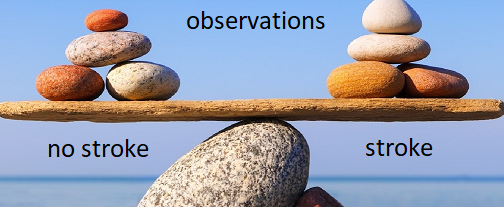
<a id="13"></a> <br>
#### 2.2 Balancing through randomly undersampling the majority class
We want to randomly sample and retain only a portion of majority class (in this case, no_brain_stroke class).

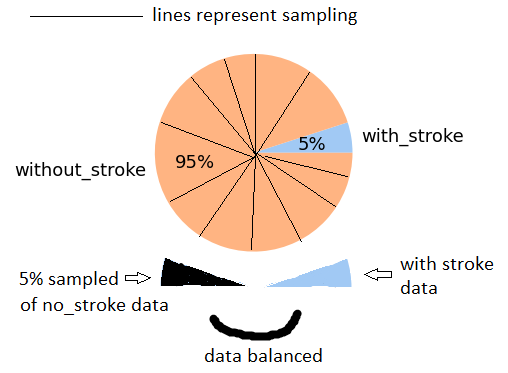

In [ ]:
df_majority = brain[brain.stroke==0].copy();
df_sampled  = df_majority.sample(frac=0.05); # keeping only 5% of data without stroke
print([len(df_sampled),len(brain[brain.stroke==1])]);

- great, now we have somewhat balanced representation of people with and without brain stroke.

In [ ]:
balanced_data = pd.concat([df_sampled,brain[brain.stroke==1]]); # concatenate sampled with brain_stroke portion
balanced_data = balanced_data.sample(frac = 1); # shuffle the data

- Now we have the balanced data, we can build a model to classify the brain_stroke class

#### <p style="color:red"> Here we make an ASSUMPTION that sampling did not do a harm in creating data bias.

<a id="13"></a> <br>
# 3. ML Modeling

<a id="14"></a> <br>
#### 3.1 Data preparation

Here we will encode our categorical features and split our data into train test for
predicting stroke class.

In [ ]:
balanced_data.replace({'gender':{'Male':0,'Female':1}, 'ever_married':{'Yes':0,'No':1}}, inplace=True);
balanced_data = pd.get_dummies(balanced_data, columns = ['work_type', 'Residence_type','smoking_status']);

# split into train and test
X = balanced_data.drop(columns = ['stroke'],axis=1);
y = balanced_data['stroke'];
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10);

<a id="15"></a> <br>
#### 3.2 Ensemble Voting model

We could take several classification model to create an ensemble model. Here we will use LinearRegression, KNN and RandomForest model to create an Ensemble Voting classifier.

Each different models within Ensemble (here in this case LinearRegression, KNN and RandomForest) predicts different outcome from the training. Ensemble have lower error and lesser overfitting as compared to individual models. Since each individual models have different bias (or personality), the biases also gets averaged out in the ensemble.

One of the Ensemble methods is the Voting classifier that combines the prediction of different models. We will use soft voting which averages the probability of predictions from different models.

In [ ]:
LogisticRegression(class_weight='balanced')
logistic_regression = LogisticRegression(max_iter=1000);
random_forest = RandomForestClassifier(n_estimators = 200);
knn           = KNeighborsClassifier(n_neighbors=3);
model = VotingClassifier (estimators=[('lr',logistic_regression), ('rf', random_forest), ('knn',knn)], voting='soft')
model.fit(X_train, y_train);
y_pred = model.predict(X_test);


<a id="16"></a> <br>
#### 3.3 Model Accuracy

##### Model accuacy score

##### Confusion matrix

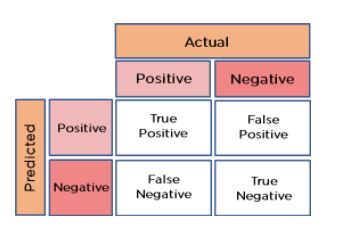!

In [ ]:
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred));

In [ ]:
print(confusion_matrix(y_test,y_pred))


- We achieved good model accuracy and a reasonable confusion matrix (diagonal dominated).

<a id="17"></a> <br>
#### 3.4 XGBoost Prediction

Extreme Gradient Boosted trees (XGBoost) is one of the most powerful ML algorithm on use currently. 
XGBoost also allows us to use regularization to prevent overfitting and obtain a generalized solution.

XGBoost is an ensemble model using many decision trees as the base learners. It is quite similar to
RandomForest.

First we need to scale numerical features and encode categorical features for optimal performance of
XGBoost.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
X.head()

#### scaling the numerical features

In [ ]:
scaler = StandardScaler()
scaler.fit(X[['age','avg_glucose_level','bmi']]);
X[['age','avg_glucose_level','bmi']] = scaler.transform(X[['age','avg_glucose_level','bmi']])
X.head()

<a id="18"></a> <br>
#### 3.5 XGBoost Accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10);
model_xgb = XGBClassifier(max_depth=3, n_estimators=1000, learning_rate=0.075, colsample_bytree=0.7, subsample=0.8)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

- We achieved a accuracy score of 77% in XGBoost.

<a id="19"></a> <br>
# 4. Conclusion

- It was fun exploring Brain stroke data. First it was a imbalanced data and hence we had to balance it out using sampling.
- Next we tried to use ensemble voting with many classifiers within and achieved a decent accuracy and confusion matrix.
- We also tried the popular XGBoost and it did not outperform ensemble voting and achieved a 78% accuracy.
- I really hope this notebook will be helpful to the community.
- As an extension, I would next like to see if our random sampling (for balancing) did any harm in creating bias for other features.